In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the dataset
import pandas as pd

df = pd.read_csv('drive/MyDrive/Colab Notebooks/Video_Games_Sales_as_at_22_Dec_2016.csv')
#Available at: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
#Remove rows with null info
df.dropna(inplace=True)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
#Remove the 'Name' feature
df.drop(['Name'], axis=1, inplace=True)
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
#Transform textual features into categorical
from sklearn.preprocessing import OrdinalEncoder

df[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']] = OrdinalEncoder().fit_transform(df[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']])
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,12.0,2006.0,10.0,160.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,771.0,1.0
2,12.0,2008.0,6.0,160.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,771.0,1.0
3,12.0,2009.0,10.0,160.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,771.0,1.0
6,2.0,2006.0,4.0,160.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,771.0,1.0
7,12.0,2006.0,3.0,160.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,771.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         6825 non-null   float64
 1   Year_of_Release  6825 non-null   float64
 2   Genre            6825 non-null   float64
 3   Publisher        6825 non-null   float64
 4   NA_Sales         6825 non-null   float64
 5   EU_Sales         6825 non-null   float64
 6   JP_Sales         6825 non-null   float64
 7   Other_Sales      6825 non-null   float64
 8   Global_Sales     6825 non-null   float64
 9   Critic_Score     6825 non-null   float64
 10  Critic_Count     6825 non-null   float64
 11  User_Score       6825 non-null   object 
 12  User_Count       6825 non-null   float64
 13  Developer        6825 non-null   float64
 14  Rating           6825 non-null   float64
dtypes: float64(14), object(1)
memory usage: 853.1+ KB


In [ ]:
X = df.drop(['Critic_Score'], axis=1)
y = df['Critic_Score']
X

In [ ]:
#Import the necessary libraries
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
#Create the pipelines
linearReg_pipeline = make_pipeline(LinearRegression())
lasso_pipeline = make_pipeline(Lasso())
elastic_pipeline = make_pipeline(ElasticNet())
decTree_pipeline = make_pipeline(DecisionTreeRegressor())

estimators = [('Linear Regression', linearReg_pipeline),
              ('Lasso', lasso_pipeline),
              ('ElasticNet', elastic_pipeline),
              ('Decision Tree Regressor', decTree_pipeline)]


#Stack the regressors using an ensemble method
stacking_regressor_Ridge = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor_Forest = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
import sklearn.metrics as metrics

scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'max_error']
scores_Ridge = []
y_pred_total_Ridge = []

for (name, est) in (estimators + [('Stacking Regressor',stacking_regressor_Ridge)]):
    score = cross_validate(est, X, y, scoring=scoring, n_jobs=-1, verbose=0)
    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
    scores_Ridge.append(score)
    y_pred_total_Ridge.append(y_pred)

print(scores_Ridge)

[{'fit_time': array([0.04832196, 0.01656342, 0.01561928, 0.01461244, 0.01280427]), 'score_time': array([0.00590134, 0.00599742, 0.00466299, 0.00497627, 0.00283003]), 'test_r2': array([-5.67888567,  0.38638905,  0.39398435,  0.39571771,  0.45417191]), 'test_neg_root_mean_squared_error': array([-28.17245609,  -9.23613083,  -9.86200649, -10.69431154,
       -10.7757638 ]), 'test_neg_mean_absolute_error': array([-14.15880208,  -7.35320093,  -7.68388767,  -8.44355972,
        -8.3435132 ]), 'test_max_error': array([-549.40498223,  -29.13429131,  -47.90888077,  -37.56665648,
        -40.1687353 ])}, {'fit_time': array([0.01699591, 0.03053117, 0.02624989, 0.01728725, 0.01167536]), 'score_time': array([0.00494051, 0.0049119 , 0.00486112, 0.00476813, 0.0029273 ]), 'test_r2': array([0.09934263, 0.3768631 , 0.39064595, 0.37522594, 0.4334773 ]), 'test_neg_root_mean_squared_error': array([-10.34552443,  -9.30754753,  -9.88913295, -10.87412678,
       -10.97814041]), 'test_neg_mean_absolute_error': 

In [ ]:
scores_Forest = []
y_pred_total_Forest = []

for (name, est) in (estimators + [('Stacking Regressor',stacking_regressor_Forest)]):
    score = cross_validate(est, X, y, scoring=scoring, n_jobs=-1, verbose=0)
    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
    scores_Forest.append(score)
    y_pred_total_Forest.append(y_pred)

print(scores_Forest)

[{'fit_time': array([0.02424502, 0.01749015, 0.02279758, 0.0150497 , 0.01028776]), 'score_time': array([0.00487375, 0.00764799, 0.00506663, 0.00481844, 0.00286269]), 'test_r2': array([-5.67888567,  0.38638905,  0.39398435,  0.39571771,  0.45417191]), 'test_neg_root_mean_squared_error': array([-28.17245609,  -9.23613083,  -9.86200649, -10.69431154,
       -10.7757638 ]), 'test_neg_mean_absolute_error': array([-14.15880208,  -7.35320093,  -7.68388767,  -8.44355972,
        -8.3435132 ]), 'test_max_error': array([-549.40498223,  -29.13429131,  -47.90888077,  -37.56665648,
        -40.1687353 ])}, {'fit_time': array([0.02219915, 0.01844335, 0.01647615, 0.02162266, 0.01554203]), 'score_time': array([0.00559568, 0.01271224, 0.00506687, 0.00521612, 0.00311112]), 'test_r2': array([0.09934263, 0.3768631 , 0.39064595, 0.37522594, 0.4334773 ]), 'test_neg_root_mean_squared_error': array([-10.34552443,  -9.30754753,  -9.88913295, -10.87412678,
       -10.97814041]), 'test_neg_mean_absolute_error': 

In [ ]:
scores = scores_Ridge + scores_Forest
r2_scores = []
rmse_scores = []
mae_scores = []
max_scores = []

for item in scores:
  #Each score goes to their own list
  r2_scores.append(item['test_r2'].mean())
  rmse_scores.append(-item['test_neg_root_mean_squared_error'].mean())
  mae_scores.append(-item['test_neg_mean_absolute_error'].mean())
  max_scores.append(abs(item['test_max_error'].mean()))

In [ ]:
#Put the metrics into a new dataset
estimators_names = ['Linear Regression (RidgeCV)', 'Lasso (RidgeCV)', 'ElasticNet (RidgeCV)', 'Decision Tree Regressor (RidgeCV)', 'Stacking Regressor (RidgeCV)', 'Linear Regression (Forests)', 'Lasso (Forests)', 'ElasticNet (Forests)', 'Decision Tree Regressor (Forests)', 'Stacking Regressor (Forests)']
dict_aux = {'Estimators': estimators_names, 'R2': r2_scores, 'Root Mean Squared Error': rmse_scores, 'Mean Absolute Error': mae_scores, 'Max Error': max_scores}
df_scores = pd.DataFrame(dict_aux)
df_scores

,Estimators,R2,Root Mean Squared Error,Mean Absolute Error,Max Error
0,Linear Regression (RidgeCV),-0.809725,13.748134,9.196593,140.836709
1,Lasso (RidgeCV),0.335111,10.278894,8.094631,39.441593
2,ElasticNet (RidgeCV),0.317713,10.416875,8.230083,38.736773
3,Decision Tree Regressor (RidgeCV),-0.072956,13.120767,10.038388,53.400000
4,Stacking Regressor (RidgeCV),-0.121943,11.996236,8.457285,107.253460
5,Linear Regression (Forests),-0.809725,13.748134,9.196593,140.836709
6,Lasso (Forests),0.335111,10.278894,8.094631,39.441593
7,ElasticNet (Forests),0.317713,10.416875,8.230083,38.736773
8,Decision Tree Regressor (Forests),-0.089699,13.242441,10.149744,55.000000
9,Stacking Regressor (Forests),0.356857,10.185403,7.921508,41.406000


In [ ]:
new_index = [0, 1, 2, 3, 8, 4, 9]

#Remove repeated values
df_scores.drop(index=[5, 6, 7], axis=0, inplace=True)
#Rename rows
df_scores['Estimators'].replace(['Linear Regression (RidgeCV)','Lasso (RidgeCV)','ElasticNet (RidgeCV)'], ['Linear Regression','Lasso','ElasticNet'], inplace=True)
#Reorganize the dataset
df_scores = df_scores.reindex(new_index)
#Rename the numbers of the rows
df_scores.rename(index={8: 4, 4: 5, 9: 6}, inplace=True)
df_scores

,Estimators,R2,Root Mean Squared Error,Mean Absolute Error,Max Error
0,Linear Regression,-0.809725,13.748134,9.196593,140.836709
1,Lasso,0.335111,10.278894,8.094631,39.441593
2,ElasticNet,0.317713,10.416875,8.230083,38.736773
3,Decision Tree Regressor (RidgeCV),-0.072956,13.120767,10.038388,53.400000
4,Decision Tree Regressor (Forests),-0.089699,13.242441,10.149744,55.000000
5,Stacking Regressor (RidgeCV),-0.121943,11.996236,8.457285,107.253460
6,Stacking Regressor (Forests),0.356857,10.185403,7.921508,41.406000


In [ ]:
#Unite y_pred_total_Ridge with y_pred_total_Forest
#Verify if there is repeated data and remove
#Reorganize the values according to the metrics dataset
y_pred_total = []
y_pred_total.append(y_pred_total_Ridge[0])
y_pred_total.append(y_pred_total_Ridge[1])
y_pred_total.append(y_pred_total_Ridge[2])
y_pred_total.append(y_pred_total_Ridge[3])
y_pred_total.append(y_pred_total_Forest[3])
y_pred_total.append(y_pred_total_Ridge[4])
y_pred_total.append(y_pred_total_Forest[4])
print(y_pred_total)

[array([625.40498223, 312.60071888, 294.04541326, ...,  71.07182903,
        62.06184147,  71.57522676]), array([79.78598017, 85.39750262, 83.42739886, ..., 70.06405035,
       62.40770756, 70.30966175]), array([79.72084365, 85.32195528, 83.68766585, ..., 69.19061221,
       63.04680528, 70.28809224]), array([85., 90., 78., ..., 62., 33., 61.]), array([87., 91., 76., ..., 62., 41., 61.]), array([455.45380876, 241.64647173, 226.3878585 , ...,  70.01960538,
        56.58836645,  72.22350656]), array([83.97, 88.74, 81.99, ..., 67.59, 65.36, 64.68])]


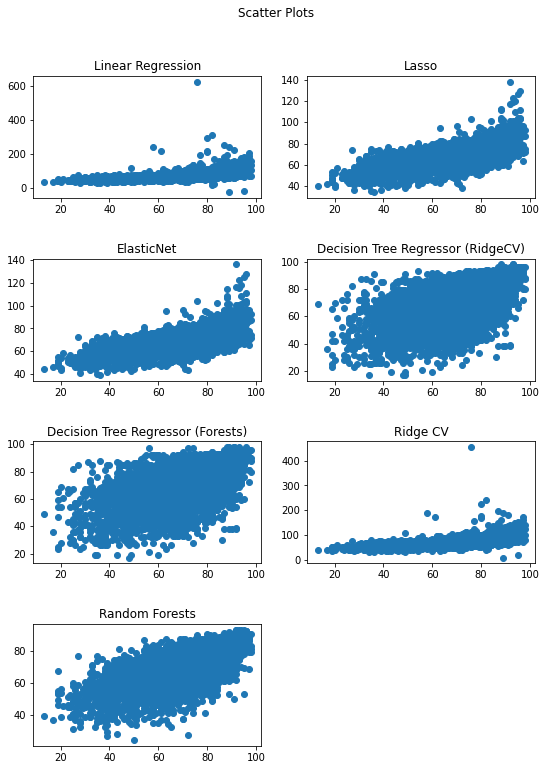

In [ ]:
import matplotlib.pyplot as plt
graph_names = ['null', 'Linear Regression', 'Lasso', 'ElasticNet', 'Decision Tree Regressor (RidgeCV)', 'Decision Tree Regressor (Forests)', 'Ridge CV', 'Random Forests']

plt.figure(figsize=(9, 12))

i=1
for value in y_pred_total:
  plt.subplot(4,2,i)
  plt.scatter(y, value)
  plt.title(graph_names[i])
  i+=1

plt.suptitle('Scatter Plots')
plt.subplots_adjust(top=0.9, hspace = 0.5)
plt.show()

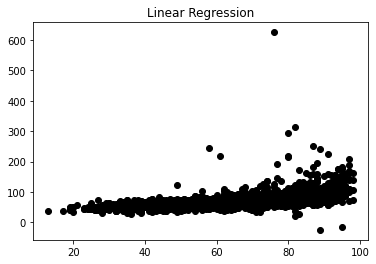

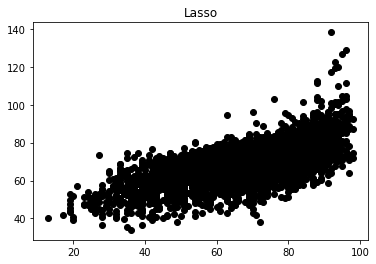

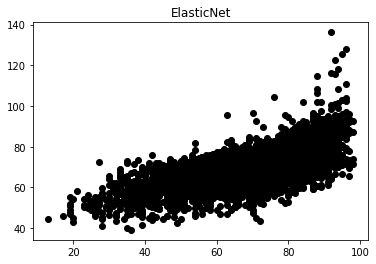

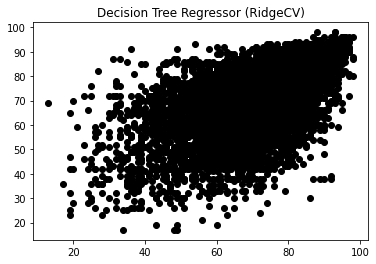

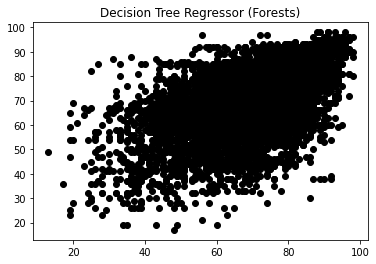

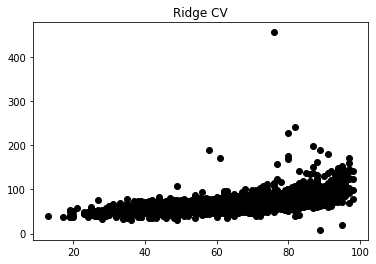

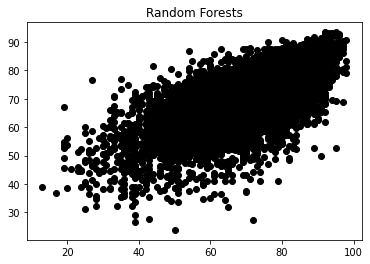

In [ ]:
graph_names = ['null', 'Linear Regression', 'Lasso', 'ElasticNet', 'Decision Tree Regressor (RidgeCV)', 'Decision Tree Regressor (Forests)', 'Ridge CV', 'Random Forests']

i=1
for value in y_pred_total:
  plt.scatter(y, value, c='k')
  plt.title(graph_names[i])
  #plt.savefig('drive/MyDrive/Mestrado UFF/Inteligência Artificial/Trabalho_Final/Graphs/Scatter' + graph_names[i] +'.png')
  plt.show()
  i+=1

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

fig.suptitle('Barplot with R2, RMSE, MAE and Max Error')
axes[0, 0].set_title('R2')
axes[0, 1].set_title('RMSE')
axes[1, 0].set_title('MAE')
axes[1, 1].set_title('Max Error')

sns.barplot(ax=axes[0, 0], data=df_scores, y='Estimators', x='R2', orient='h', palette='Greys')
sns.barplot(ax=axes[0, 1], data=df_scores, y='Estimators', x='Root Mean Squared Error', orient='h', palette='Greys')
sns.barplot(ax=axes[1, 0], data=df_scores, y='Estimators', x='Mean Absolute Error', orient='h', palette='Greys')
sns.barplot(ax=axes[1, 1], data=df_scores, y='Estimators', x='Max Error', orient='h', palette='Greys')

In [ ]:
estimators_names_test = ['Linear Regression', 'Lasso', 'ElasticNet', 'Decision Tree (RidgeCV)', 'RidgeCV', 'Decision Tree (Forests)', 'Random Forests']
df_scores_test = df_scores.copy()
df_scores_test['Estimators'].replace(['Linear Regression', 'Lasso', 'ElasticNet', 'Decision Tree Regressor (RidgeCV)', 'Decision Tree Regressor (Forests)', 'Stacking Regressor (RidgeCV)', 'Stacking Regressor (Forests)'], ['(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)'], inplace=True)
df_scores_test

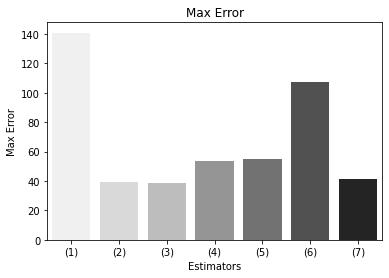

In [ ]:
import seaborn as sns

#plt.title('R2')
#plt.title('RMSE')
#plt.title('MAE')
plt.title('Max Error')

#sns.barplot(data=df_scores_test, x='Estimators', y='R2', palette='Greys')
#sns.barplot(data=df_scores_test, x='Estimators', y='Root Mean Squared Error', palette='Greys')
#sns.barplot(data=df_scores_test, x='Estimators', y='Mean Absolute Error', palette='Greys')
sns.barplot(data=df_scores_test, x='Estimators', y='Max Error', palette='Greys')

#plt.savefig('drive/MyDrive/Mestrado UFF/Inteligência Artificial/Trabalho_Final/Graphs/MaxError.png')

# Try with new parameters



In [ ]:
#Create the pipelines
linearReg_pipeline_2 = make_pipeline(LinearRegression(normalize=True))
lasso_pipeline_2 = make_pipeline(Lasso(alpha=0.1))
elastic_pipeline_2 = make_pipeline(ElasticNet(l1_ratio=1))
decTree_pipeline_2 = make_pipeline(DecisionTreeRegressor(criterion='mae'))

estimators = [('Linear Regression', linearReg_pipeline),
              ('Lasso', lasso_pipeline),
              ('ElasticNet', elastic_pipeline),
              ('Decision Tree Regressor', decTree_pipeline)]


#Stack the regressors using an ensemble method
stacking_regressor_Ridge_2 = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor_Forest_2 = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())

In [ ]:
#Divide the dataset in two sets: one for training and one for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Critic_Score'], axis=1), df['Critic_Score'], test_size=0.3, random_state=42)
#y_train and y_test have the 'Critic_Score' column

In [ ]:
scores_Ridge_2 = []
y_pred_total_Ridge_2 = []

for (name, est) in (estimators + [('Stacking Regressor',stacking_regressor_Ridge)]):
    score = cross_validate(est, X_test, y_test, scoring=scoring, n_jobs=-1, verbose=0)
    y_pred = cross_val_predict(est, X_test, y_test, n_jobs=-1, verbose=0)
    scores_Ridge_2.append(score)
    y_pred_total_Ridge_2.append(y_pred)

print(scores_Ridge_2)

[{'fit_time': array([0.00771642, 0.00725722, 0.00574923, 0.00632048, 0.00642252]), 'score_time': array([0.00454354, 0.00397706, 0.00324726, 0.00354385, 0.00362444]), 'test_r2': array([0.46815417, 0.51980625, 0.45366281, 0.54693425, 0.50554648]), 'test_neg_root_mean_squared_error': array([-10.30821733,  -9.8642879 ,  -9.98019014,  -9.72330942,
        -9.64156313]), 'test_neg_mean_absolute_error': array([-7.98545179, -7.70186006, -7.86137427, -7.48248622, -7.58449902]), 'test_max_error': array([-39.51140918, -51.88727559, -33.36517633, -34.06831148,
       -35.73040618])}, {'fit_time': array([0.00754428, 0.00804925, 0.00667596, 0.00732136, 0.00620675]), 'score_time': array([0.00349736, 0.00355053, 0.00369787, 0.003721  , 0.00225759]), 'test_r2': array([0.45853746, 0.52951232, 0.43928468, 0.53908139, 0.4969967 ]), 'test_neg_root_mean_squared_error': array([-10.40099521,  -9.76408647, -10.11066323,  -9.80721309,
        -9.72456376]), 'test_neg_mean_absolute_error': array([-8.0689607 , -7

In [ ]:
scores_Forest_2 = []
y_pred_total_Forest_2 = []

for (name, est) in (estimators + [('Stacking Regressor',stacking_regressor_Forest)]):
    score = cross_validate(est, X_test, y_test, scoring=scoring, n_jobs=-1, verbose=0)
    y_pred = cross_val_predict(est, X_test, y_test, n_jobs=-1, verbose=0)
    scores_Forest_2.append(score)
    y_pred_total_Forest_2.append(y_pred)

print(scores_Forest_2)

[{'fit_time': array([0.00827599, 0.0065105 , 0.00635433, 0.01184678, 0.00571704]), 'score_time': array([0.00820971, 0.00395322, 0.00381589, 0.00449991, 0.00231194]), 'test_r2': array([0.46815417, 0.51980625, 0.45366281, 0.54693425, 0.50554648]), 'test_neg_root_mean_squared_error': array([-10.30821733,  -9.8642879 ,  -9.98019014,  -9.72330942,
        -9.64156313]), 'test_neg_mean_absolute_error': array([-7.98545179, -7.70186006, -7.86137427, -7.48248622, -7.58449902]), 'test_max_error': array([-39.51140918, -51.88727559, -33.36517633, -34.06831148,
       -35.73040618])}, {'fit_time': array([0.00738406, 0.00747371, 0.00844979, 0.00752759, 0.00607157]), 'score_time': array([0.00359583, 0.00354886, 0.00416207, 0.00376844, 0.00224733]), 'test_r2': array([0.45853746, 0.52951232, 0.43928468, 0.53908139, 0.4969967 ]), 'test_neg_root_mean_squared_error': array([-10.40099521,  -9.76408647, -10.11066323,  -9.80721309,
        -9.72456376]), 'test_neg_mean_absolute_error': array([-8.0689607 , -7

In [ ]:
scores_2 = scores_Ridge + scores_Forest
r2_scores_2 = []
rmse_scores_2 = []
mae_scores_2 = []
max_scores_2 = []

for item in scores:
  #Each score goes to their own list
  r2_scores_2.append(item['test_r2'].mean())
  rmse_scores_2.append(-item['test_neg_root_mean_squared_error'].mean())
  mae_scores_2.append(-item['test_neg_mean_absolute_error'].mean())
  max_scores_2.append(abs(item['test_max_error'].mean()))

In [ ]:
#Put the metrics into a new dataset
dict_aux = {'Estimators': estimators_names, 'R2': r2_scores_2, 'Root Mean Squared Error': rmse_scores_2, 'Mean Absolute Error': mae_scores_2, 'Max Error': max_scores_2}
df_scores_2 = pd.DataFrame(dict_aux)
df_scores_2

,Estimators,R2,Root Mean Squared Error,Mean Absolute Error,Max Error
0,Linear Regression (RidgeCV),-0.809725,13.748134,9.196593,140.836709
1,Lasso (RidgeCV),0.335111,10.278894,8.094631,39.441593
2,ElasticNet (RidgeCV),0.317713,10.416875,8.230083,38.736773
3,Decision Tree Regressor (RidgeCV),-0.084358,13.181706,10.095092,53.400000
4,Stacking Regressor (RidgeCV),-0.139706,12.049894,8.476259,107.778824
5,Linear Regression (Forests),-0.809725,13.748134,9.196593,140.836709
6,Lasso (Forests),0.335111,10.278894,8.094631,39.441593
7,ElasticNet (Forests),0.317713,10.416875,8.230083,38.736773
8,Decision Tree Regressor (Forests),-0.090132,13.210619,10.147692,55.800000
9,Stacking Regressor (Forests),0.355064,10.189389,7.881776,43.036000


In [ ]:
new_index = [0, 1, 2, 3, 8, 4, 9]

#Remove repeated values
df_scores_2.drop(index=[5, 6, 7], axis=0, inplace=True)
#Rename rows
df_scores_2['Estimators'].replace(['Linear Regression (RidgeCV)','Lasso (RidgeCV)','ElasticNet (RidgeCV)'], ['Linear Regression','Lasso','ElasticNet'], inplace=True)
#Reorganize the dataset
df_scores_2 = df_scores_2.reindex(new_index)
#Rename the numbers of the rows
df_scores_2.rename(index={8: 4, 4: 5, 9: 6}, inplace=True)
df_scores_2

,Estimators,R2,Root Mean Squared Error,Mean Absolute Error,Max Error
0,Linear Regression,-0.809725,13.748134,9.196593,140.836709
1,Lasso,0.335111,10.278894,8.094631,39.441593
2,ElasticNet,0.317713,10.416875,8.230083,38.736773
3,Decision Tree Regressor (RidgeCV),-0.084358,13.181706,10.095092,53.400000
4,Decision Tree Regressor (Forests),-0.090132,13.210619,10.147692,55.800000
5,Stacking Regressor (RidgeCV),-0.139706,12.049894,8.476259,107.778824
6,Stacking Regressor (Forests),0.355064,10.189389,7.881776,43.036000


In [ ]:
#Unite y_pred_total_Ridge with y_pred_total_Forest
#Verify if there is repeated data and remove
#Reorganize the values according to the metrics dataset
y_pred_total_2 = []
y_pred_total_2.append(y_pred_total_Ridge_2[0])
y_pred_total_2.append(y_pred_total_Ridge_2[1])
y_pred_total_2.append(y_pred_total_Ridge_2[2])
y_pred_total_2.append(y_pred_total_Ridge_2[3])
y_pred_total_2.append(y_pred_total_Forest_2[3])
y_pred_total_2.append(y_pred_total_Ridge_2[4])
y_pred_total_2.append(y_pred_total_Forest_2[4])
print(y_pred_total_2)

[array([85.93297536, 76.7095531 , 77.13092227, ..., 62.44267985,
       60.05206218, 72.40394513]), array([84.12555237, 76.64406638, 76.89070376, ..., 62.93191067,
       60.76238998, 71.61270852]), array([82.60136928, 76.23774697, 75.41231153, ..., 62.38677951,
       61.19001556, 70.58866901]), array([96., 64., 74., ..., 64., 52., 76.]), array([96., 64., 79., ..., 64., 52., 74.]), array([87.35497954, 74.69819105, 75.86201795, ..., 62.89626961,
       58.75407852, 73.49530753]), array([92.89, 75.36, 69.34, ..., 66.85, 57.37, 73.47])]


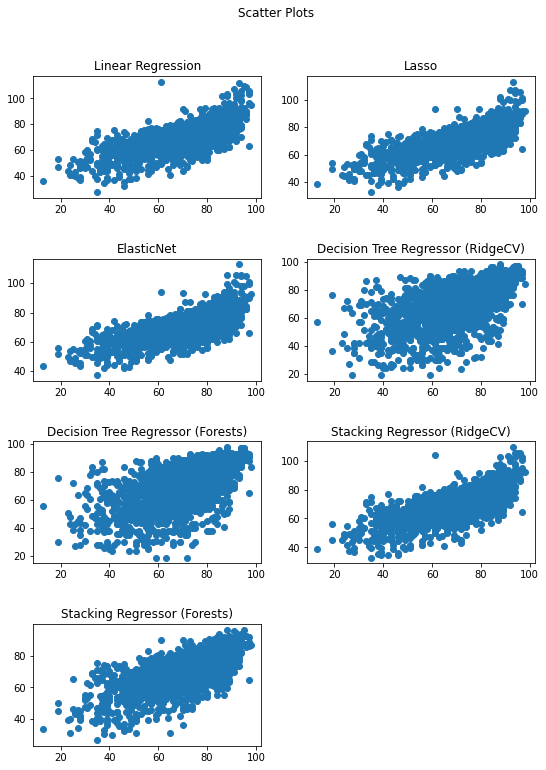

In [ ]:
plt.figure(figsize=(9, 12))

i=1
for value in y_pred_total_2:
  plt.subplot(4,2,i)
  plt.scatter(y_test,value)
  plt.title(graph_names[i])
  i+=1

#plt.subplot(numero de linhas,numero de colunas,numero do gráfico(começa no 0 e vai +1))
plt.suptitle('Scatter Plots')
plt.subplots_adjust(top=0.9, hspace = 0.5)
plt.show()